In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

## DLCV Sprint 2018 HW2
### d05921018 林家慶

In [2]:
import glob
import re
import numpy as np
import skimage
import skimage.io
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
from sklearn.decomposition import PCA

## for Problem 2
from sklearn.cluster import KMeans
import scipy.io
from scipy.signal import convolve2d

## for Problem 3
import cv2
from mpl_toolkits.mplot3d import Axes3D
import os
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

## Problem 1

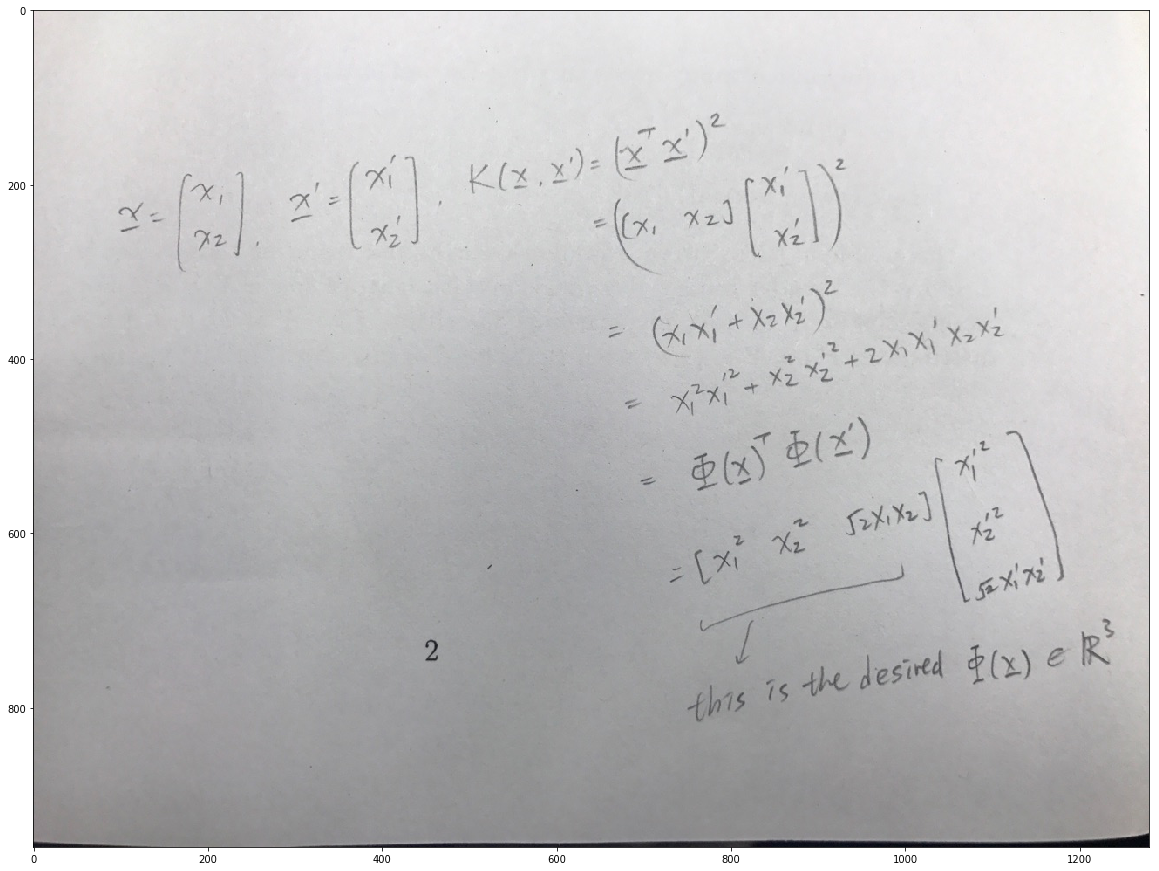

In [3]:
prob1 = skimage.io.imread("./p1.jpg")
plt.figure(figsize=(20,20))
plt.imshow(prob1)

## Problem 2: Color and Texture Segmentation

### (a) Color segmentation 

In [4]:
# ## debug codes
# img_path = '/data/put_data/cclin/ntu/dlcv2018/hw2/Problem2/mountain.jpg'
# img = skimage.io.imread(img_path)
# print(img.shape)
# img_rgb = img.reshape(-1,3)
# print(img_rgb.shape)
# print(np.min(img))
# print(np.max(img))

#### (i) Color segmentation results based on RGB

In [5]:
def kmeans_seg_rgb(img_path, n_clusters=10, max_iter=1000, random_state=0):
    img = skimage.io.imread(img_path)
    img_3d = img.reshape(-1,3)
    
    # learning dictionary
    kmeans = KMeans(n_clusters=n_clusters, max_iter=max_iter, random_state=random_state)
    kmeans.fit(img_3d)
    # color encoding
    color_dict = {0:[230, 25, 75],1:[60, 180, 75],2:[255, 225, 25],3:[0, 130, 200],4:[245, 130, 48],
              5:[145, 30, 180],6:[70, 240, 240], 7:[240, 50, 230], 8:[210, 245, 60], 9:[250, 190, 190]
             }
    img_seg = np.array([color_dict[i] for i in kmeans.labels_], dtype=np.uint8)
    img_seg = img_seg.reshape(img.shape)
    return img_seg

In [6]:
mountain_seg_rgb = kmeans_seg_rgb("/data/put_data/cclin/ntu/dlcv2018/hw2/Problem2/mountain.jpg", random_state=1002)
zebra_seg_rgb = kmeans_seg_rgb("/data/put_data/cclin/ntu/dlcv2018/hw2//Problem2/zebra.jpg", random_state=514)

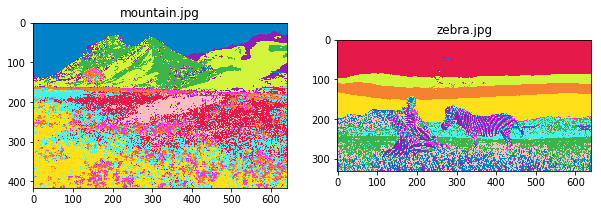

In [7]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("mountain.jpg")
plt.imshow(mountain_seg_rgb)
plt.subplot(1,2,2)
plt.title("zebra.jpg")
plt.imshow(zebra_seg_rgb)
plt.show()

#### (ii) Color segmentation results based on Lab

In [8]:
def kmeans_seg_lab(img_path, n_clusters=10, max_iter=1000, random_state=0):
    img = skimage.io.imread(img_path)
    img = skimage.color.rgb2lab(img)
    img_3d = img.reshape(-1,3)
    
    # learning dictionary
    kmeans = KMeans(n_clusters=n_clusters, max_iter=max_iter, random_state=random_state)
    kmeans.fit(img_3d)
    # color encoding
    color_dict = {0:[230, 25, 75],1:[60, 180, 75],2:[255, 225, 25],3:[0, 130, 200],4:[245, 130, 48],
              5:[145, 30, 180],6:[70, 240, 240], 7:[240, 50, 230], 8:[210, 245, 60], 9:[250, 190, 190]
             }
    img_seg = np.array([color_dict[i] for i in kmeans.labels_], dtype=np.uint8)
    img_seg = img_seg.reshape(img.shape)
    return img_seg

In [9]:
mountain_seg_lab = kmeans_seg_lab("/data/put_data/cclin/ntu/dlcv2018/hw2/Problem2/mountain.jpg", random_state=1002)
zebra_seg_lab = kmeans_seg_lab("/data/put_data/cclin/ntu/dlcv2018/hw2//Problem2/zebra.jpg", random_state=514)

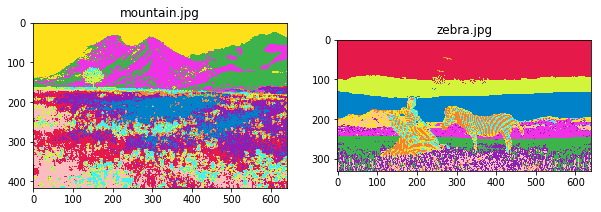

In [10]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("mountain.jpg")
plt.imshow(mountain_seg_lab)
plt.subplot(1,2,2)
plt.title("zebra.jpg")
plt.imshow(zebra_seg_lab)
plt.show()

### (b) Texture segmentation

In [11]:
# ## debug codes
# def my_rgb2gray(rgb):
#     return np.dot(rgb[..., :3], [0.299, 0.587, 0.114])

# img_path = '/data/put_data/cclin/ntu/dlcv2018/hw2/Problem2/mountain.jpg'
# img = skimage.io.imread(img_path)
# img_1 = my_rgb2gray(img)
# print(img_1.shape)
# print(img_1)
# img_2 = skimage.color.rgb2gray(img)*256
# print(img_2.shape)
# print(img_2)

# plt.figure(figsize=(10,5))
# plt.subplot(1,2,1)
# plt.title("img_1")
# plt.imshow(img_1, cmap='gray')
# plt.subplot(1,2,2)
# plt.title("img_2")
# plt.imshow(img_2, cmap='gray')
# plt.show()

In [15]:
# ## debug codes
# img = skimage.io.imread('/data/put_data/cclin/ntu/dlcv2018/hw2/Problem2/mountain.jpg')
# img_gray = (skimage.color.rgb2gray(img)*256).astype(int)
# print(img_gray.shape)

filterBank = scipy.io.loadmat('/data/put_data/cclin/ntu/dlcv2018/hw2/Problem2/filterBank.mat')
filterBank = filterBank["F"]
# print(filterBank.shape)
# filtered_map = []

# for i in range(filterBank.shape[2]):
#     filtered = convolve2d(img_gray, filterBank[:,:,i], mode="same", boundary="symm")
#     filtered_map.append(filtered)
# filtered_map = np.rollaxis(np.array(filtered_map), 0,3)
# image_3d = filtered_map.reshape(-1,38)

# print(image_3d.shape)

#### (i) Texture segmentation results

In [16]:
def kmeans_seg_texture(img_path, filterBank, n_clusters=6, max_iter=1000, random_state=0):
    img = skimage.io.imread(img_path)
    img_gray = (skimage.color.rgb2gray(img)*256).astype(int)
    
    filtered_map = []
    for i in range(filterBank.shape[2]):
        filtered = convolve2d(img_gray, filterBank[:,:,i], mode="same", boundary="symm")
        filtered_map.append(filtered)
    filtered_map = np.rollaxis(np.array(filtered_map), 0, 3)
    img_38d = filtered_map.reshape(-1, 38)
    
    # learning dictionary
    kmeans = KMeans(n_clusters=n_clusters, max_iter=max_iter, random_state=random_state)
    kmeans.fit(img_38d)
    # color encoding
    color_dict = {0:[230, 25, 75],1:[60, 180, 75],2:[255, 225, 25],3:[0, 130, 200],4:[245, 130, 48],
              5:[145, 30, 180],6:[70, 240, 240], 7:[240, 50, 230], 8:[210, 245, 60], 9:[250, 190, 190]
             }
    img_seg = np.array([color_dict[i] for i in kmeans.labels_], dtype=np.uint8)
    img_seg = img_seg.reshape(img.shape)
    return img_seg

In [17]:
mountain_seg_texture = kmeans_seg_texture("/data/put_data/cclin/ntu/dlcv2018/hw2/Problem2/mountain.jpg", filterBank, random_state=1002)
zebra_seg_texture = kmeans_seg_texture("/data/put_data/cclin/ntu/dlcv2018/hw2//Problem2/zebra.jpg", filterBank, random_state=514)

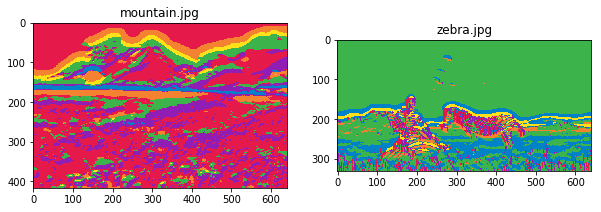

In [18]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("mountain.jpg")
plt.imshow(mountain_seg_texture)
plt.subplot(1,2,2)
plt.title("zebra.jpg")
plt.imshow(zebra_seg_texture)
plt.show()

#### (ii) Combine both color and texture features for segmentation

In [19]:
def kmeans_seg_lab_texture(img_path, filterBank, n_clusters=6, max_iter=1000, random_state=0):
    img = skimage.io.imread(img_path)
    img_lab = skimage.color.rgb2lab(img).reshape(-1,3)
    img_gray = (skimage.color.rgb2gray(img)*256).astype(int)
    
    filtered_map = []
    for i in range(filterBank.shape[2]):
        filtered = convolve2d(img_gray, filterBank[:,:,i], mode="same", boundary="symm")
        filtered_map.append(filtered)
    filtered_map = np.rollaxis(np.array(filtered_map), 0, 3)
    img_38d = filtered_map.reshape(-1, 38)
    
    img_41d = np.concatenate((img_lab,img_38d),1)
    
    # learning dictionary
    kmeans = KMeans(n_clusters=n_clusters, max_iter=max_iter, random_state=random_state)
    kmeans.fit(img_41d)
    # color encoding
    color_dict = {0:[230, 25, 75],1:[60, 180, 75],2:[255, 225, 25],3:[0, 130, 200],4:[245, 130, 48],
              5:[145, 30, 180],6:[70, 240, 240], 7:[240, 50, 230], 8:[210, 245, 60], 9:[250, 190, 190]
             }
    img_seg = np.array([color_dict[i] for i in kmeans.labels_], dtype=np.uint8)
    img_seg = img_seg.reshape(img.shape)
    return img_seg

In [20]:
mountain_seg_lab_texture = kmeans_seg_lab_texture("/data/put_data/cclin/ntu/dlcv2018/hw2/Problem2/mountain.jpg", filterBank, random_state=1002)
zebra_seg_lab_texture = kmeans_seg_lab_texture("/data/put_data/cclin/ntu/dlcv2018/hw2//Problem2/zebra.jpg", filterBank, random_state=514)

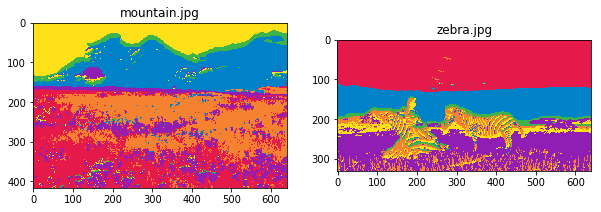

In [21]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("mountain.jpg")
plt.imshow(mountain_seg_lab_texture)
plt.subplot(1,2,2)
plt.title("zebra.jpg")
plt.imshow(zebra_seg_lab_texture)
plt.show()

## Problem 3 : Recognition with Bag of Visual Words

### (a) Interest point detection

In [ ]:
# # debug codes
# train10_files = glob.glob('/data/put_data/cclin/ntu/dlcv2018/hw2/Problem3/train-10/*/*.jpg')
# # print(train10_files)
# img_path = np.random.choice(train10_files)
# print(img_path)

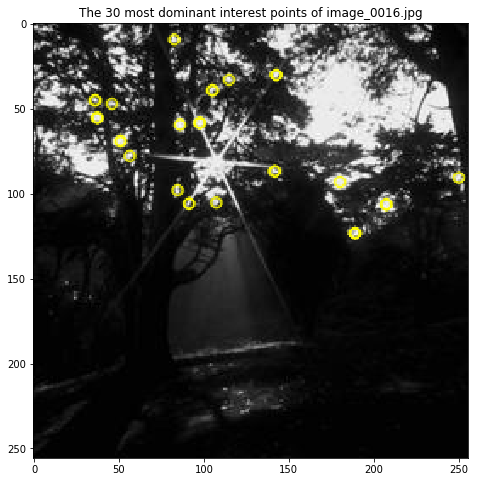

In [22]:
img_path = np.random.choice(glob.glob('/data/put_data/cclin/ntu/dlcv2018/hw2/Problem3/train-10/*/*.jpg'))
img_random = skimage.io.imread(img_path)

sift = cv2.xfeatures2d.SIFT_create(nfeatures=30)

keypoints, descriptors = sift.detectAndCompute(img_random, None)
# print("number of keypoints", len(keypoints))
backtorgb = cv2.cvtColor(img_random, cv2.COLOR_GRAY2RGB)
# for k in keypoints:
#     cv2.circle(backtorgb,(int(k.pt[0]),int(k.pt[1])),2,(255,0,0),1)
backtorgb = cv2.drawKeypoints(backtorgb,keypoints,None,(255,255,0),2)
plt.figure(figsize=(10,8))
plt.title('The %d most dominant interest points of %s' % (len(keypoints), os.path.basename(img_path)))
plt.imshow(backtorgb)
plt.show()

### (b) Visual words

In [23]:
def extract_points(img_path):
    img = skimage.io.imread(img_path)
    ob = cv2.xfeatures2d.SURF_create(500)
    keypoints, descriptors = ob.detectAndCompute(img, None)
    keypoints = [k.pt for k in keypoints]
    return keypoints, descriptors

In [24]:
# Extract all interesting points
train10_files = glob.glob('/data/put_data/cclin/ntu/dlcv2018/hw2/Problem3/train-10/*/*.jpg')

keypoints_list = []
descriptors_list = []
for img_path in train10_files:
    keypoints, descriptors = extract_points(img_path)
    keypoints_list += keypoints
    descriptors_list += list(descriptors)
keypoints_list = np.array(keypoints_list)
descriptors_list = np.array(descriptors_list)

# print("interesting points shape", keypoints_list.shape)
print("Total dimension of the descriptors: ", descriptors_list.shape)

Total dimension of the descriptors:  (14034, 64)


In [25]:
# K-means clustering
kmeans = KMeans(n_clusters=50, max_iter=5000)
kmeans.fit(descriptors_list)

cluster_centroid = kmeans.cluster_centers_
clusters = kmeans.labels_
# print("Total dimension of cluster centroid", cluster_centroid.shape)

In [26]:
# 3-dimensional PCA
pca = PCA(n_components=3)
reduced_descriptors = pca.fit_transform(descriptors_list)

In [27]:
# Randomly select 6 cluster
random_cluster = np.random.choice(50, 6, replace=False)
print("Randomly selected clusters:", random_cluster)
selected_index = np.isin(clusters, random_cluster)
select_cluster = clusters[selected_index]
select_descriptor = reduced_descriptors[selected_index]
select_centroid = pca.transform(cluster_centroid[random_cluster])
print("Number of interesting points from the selected clusters:", len(select_cluster))

Randomly selected clusters: [13 29 21 37 23 40]
Number of interesting points from the selected clusters: 1888


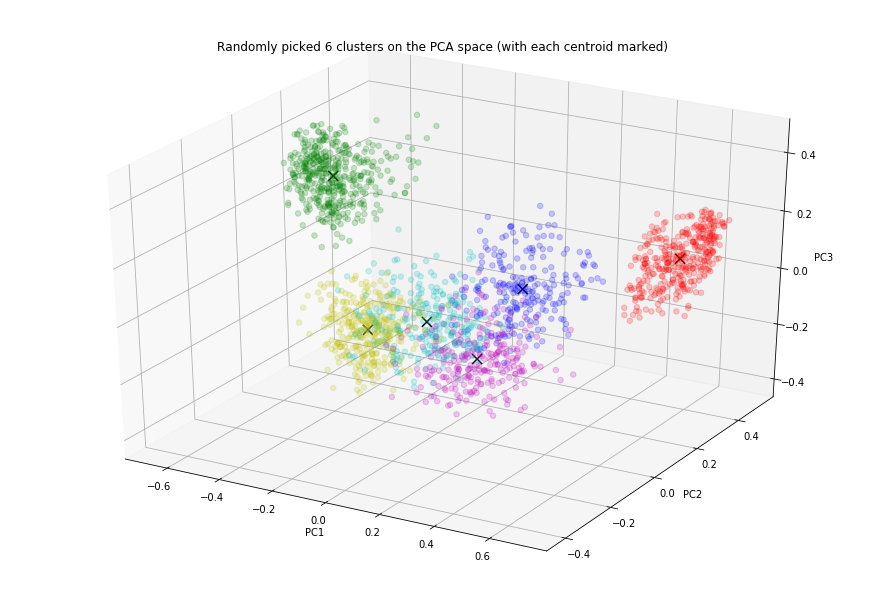

In [28]:
# Plot the visual words and the associated interest points
color_dict = {}
for clus, col in zip(np.unique(select_cluster), ['b','g','r','c','m','y']):
    color_dict[clus] = col
select_color = [color_dict[clus] for clus in select_cluster]

fig = plt.figure(figsize=(12,8))
ax = Axes3D(fig)
ax.scatter(select_descriptor[:,0], select_descriptor[:,1], select_descriptor[:,2],
           s=30,
           c=select_color,
           alpha=0.2
          )
ax.scatter(select_centroid[:,0], select_centroid[:,1], select_centroid[:,2],
           s=100,
           c='black', 
           marker = 'x',
           label = "centroids",
          alpha=1)
# ax.legend()
ax.set_title("Randomly picked 6 clusters on the PCA space (with each centroid marked)")
ax.grid(True)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

### (c) BoW features

In [29]:
# BoW encoding for each image
def BoW_hard_sum(img_path):    
    descriptors = extract_points(img_path)[1] # (n_points, 64)
    d_c_matrix = np.array([[np.linalg.norm(d-c) for c in cluster_centroid] # compute l1 norm distance
                           for d in descriptors]) # (n_points, cluster)
    
    unique_counts = np.unique(np.argmin(d_c_matrix, axis=1), return_counts=True)
    feature_vector = np.zeros(len(cluster_centroid))
    for c, count in zip(unique_counts[0],unique_counts[1]): # c: max 
        feature_vector[c] = count
    feature_vector = feature_vector/d_c_matrix.shape[0] # normalize
    return feature_vector

def BoW_soft_sum(img_path):    
    descriptors = extract_points(img_path)[1] # (n_points, 64)
    d_c_matrix = np.array([[np.linalg.norm(d-c) for c in cluster_centroid] # compute l1 norm distance
                           for d in descriptors]) # (n_points, cluster)
    
    reciprocal_matrix = np.reciprocal(d_c_matrix)
    return(np.mean(np.divide(reciprocal_matrix.T, 
                             reciprocal_matrix.sum(axis=1)
                            ).T
                   , axis=0))

def BoW_soft_max(img_path):    
    descriptors = extract_points(img_path)[1] # (n_points, 64)
    d_c_matrix = np.array([[np.linalg.norm(d-c) for c in cluster_centroid] # compute l1 norm distance
                           for d in descriptors]) # (n_points, cluster)
    
    reciprocal_matrix = np.reciprocal(d_c_matrix)
    return(np.max(reciprocal_matrix, axis=0))

In [30]:
# construct 50*c matrix
train_X_hard_sum = np.array([BoW_hard_sum(img_path) for img_path in train10_files])
train_X_soft_sum = np.array([BoW_soft_sum(img_path) for img_path in train10_files])
train_X_soft_max = np.array([BoW_soft_max(img_path) for img_path in train10_files])

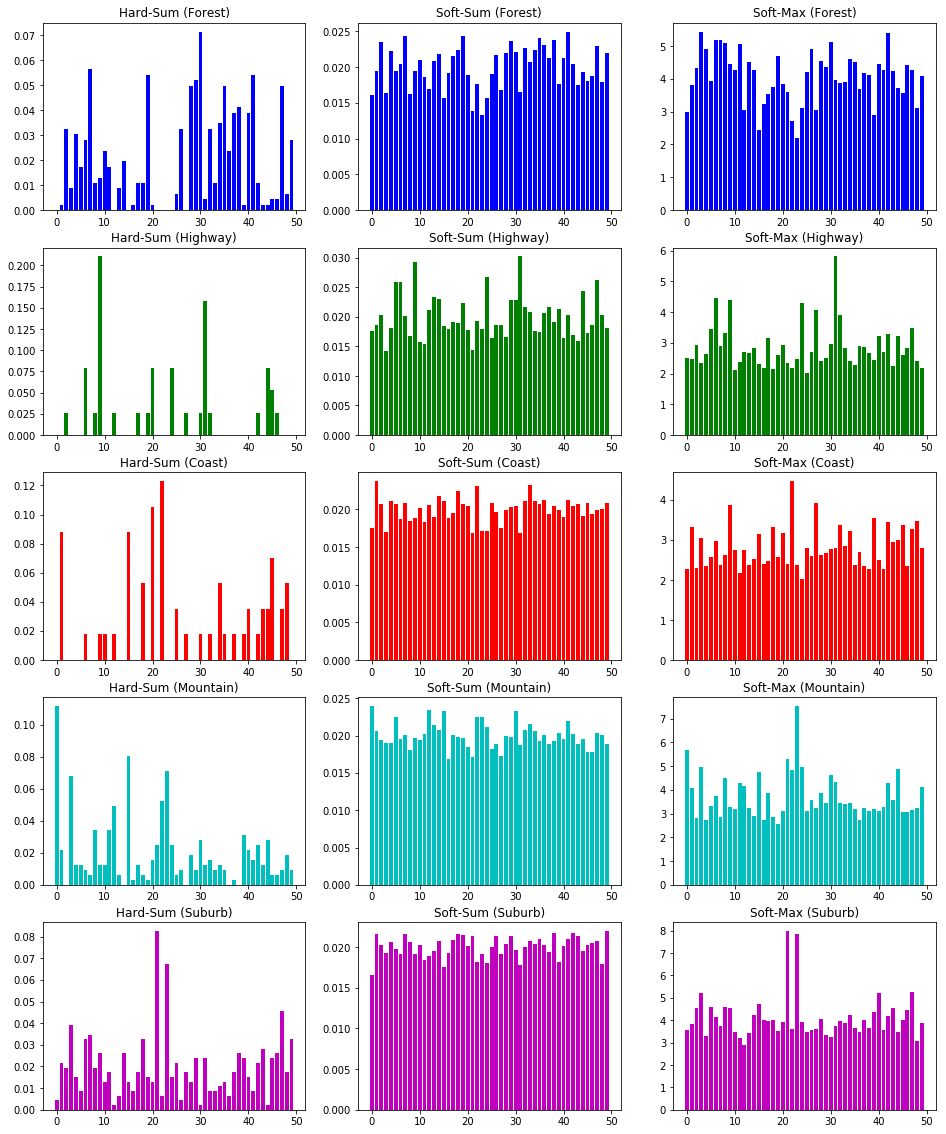

In [31]:
# Choose one image from each category and plot their Hard-Sum, Soft-Sum, and Soft-Max, respectively
cat_list = os.listdir("/data/put_data/cclin/ntu/dlcv2018/hw2/Problem3/train-10/")

plt.figure(figsize=(16,20))
col = 1
for i,cat,color in zip([1,11,21,31,41], cat_list, ['b','g','r','c','m']):
    plt.subplot(5,3,col)
    plt.title("Hard-Sum ("+ cat +")")
    plt.bar(np.arange(train_X_hard_sum.shape[1]), train_X_hard_sum[i],color=color )
    col+=1
    plt.subplot(5,3,col)
    plt.title("Soft-Sum ("+ cat +")")
    plt.bar(np.arange(train_X_soft_sum.shape[1]), train_X_soft_sum[i],color=color )
    col+=1
    plt.subplot(5,3,col)
    plt.title("Soft-Max ("+ cat +")")
    plt.bar(np.arange(train_X_soft_max.shape[1]), train_X_soft_max[i],color=color )
    col+=1
plt.show()

It seems that **Soft-Max** is expected to lead to the best classification results since it possesses more variations among those 50 visual words, whereas **Soft-Sum** produces almost constant values among visual words. As for **Hard-Sum**, although it possesses some variations among visual words, the values are too sparse thus may not be very discriminative.

### (d) k-nearest neighbors classifier

#### (i) Use Train-10 as the training data and Test-100 for testing

In [32]:
# training
train_y = np.array([[i]*10 for i in range(5)]).flatten()
knn_hard_sum = KNeighborsClassifier(n_neighbors=5, n_jobs=10)
knn_hard_sum.fit(train_X_hard_sum, train_y)

knn_soft_sum = KNeighborsClassifier(n_neighbors=5, n_jobs=10)
knn_soft_sum.fit(train_X_soft_sum, train_y)

knn_soft_max = KNeighborsClassifier(n_neighbors=5, n_jobs=10)
knn_soft_max.fit(train_X_soft_max, train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=10, n_neighbors=5, p=2,
           weights='uniform')

In [33]:
# load testing data
test100_files = glob.glob('/data/put_data/cclin/ntu/dlcv2018/hw2/Problem3/test-100/*/*.jpg')
test_X_hard_sum = np.array([BoW_hard_sum(img_path) for img_path in test100_files])
test_X_soft_sum = np.array([BoW_soft_sum(img_path) for img_path in test100_files])
test_X_soft_max = np.array([BoW_soft_max(img_path) for img_path in test100_files])
test_y = np.array([[i]*100 for i in range(5)]).flatten()

In [34]:
print("classification accuracy (Hard-Sum): ", accuracy_score(y_pred=knn_hard_sum.predict(test_X_hard_sum), y_true=test_y))
print("classification accuracy (Soft-Sum): ", accuracy_score(y_pred=knn_soft_sum.predict(test_X_soft_sum), y_true=test_y))
print("classification accuracy (Soft-Max): ", accuracy_score(y_pred=knn_soft_max.predict(test_X_soft_max), y_true=test_y))

classification accuracy (Hard-Sum):  0.554
classification accuracy (Soft-Sum):  0.516
classification accuracy (Soft-Max):  0.52


It can be seen that **Hard-Sum** leads to the best classification results, followed by **Soft-Max**. The reason of **Soft-Max** not being the best may be due to the size of training data (too small).

### (ii) Use train-100 for training

In [35]:
train100_files = glob.glob('/data/put_data/cclin/ntu/dlcv2018/hw2/Problem3/train-100/*/*.jpg')

# dictionary learning 
keypoints_list = []
descriptors_list = []
for img_path in train100_files:
    keypoints, descriptors = extract_points(img_path)
    keypoints_list += keypoints
    descriptors_list += list(descriptors)
keypoints_list = np.array(keypoints_list)
descriptors_list = np.array(descriptors_list)

# print("interesting points shape", keypoints_list.shape)
print("Total dimension of the descriptors: ", descriptors_list.shape)

Total dimension of the descriptors:  (150619, 64)


In [36]:
# kmeans cluster
kmeans = KMeans(n_clusters=100,max_iter=5000, n_jobs = 10)
kmeans.fit(descriptors_list)

cluster_centroid = kmeans.cluster_centers_
clusters = kmeans.labels_
# print("cluster centroid", cluster_centroid.shape)

# construct trianing matrix
train_X_hard_sum = np.array([BoW_hard_sum(img_path) for img_path in train100_files])
train_X_soft_sum = np.array([BoW_soft_sum(img_path) for img_path in train100_files])
train_X_soft_max = np.array([BoW_soft_max(img_path) for img_path in train100_files])

Use number of visual words $C=100$ with maximum iteration $= 5000$ in K-Means, and $k=10$ for KNN classifier.

In [37]:
# training
train_y = np.array([[i]*100 for i in range(5)]).flatten()
knn_hard_sum = KNeighborsClassifier(n_neighbors=10, n_jobs=10)
knn_hard_sum.fit(train_X_hard_sum, train_y)

knn_soft_sum = KNeighborsClassifier(n_neighbors=10, n_jobs=10)
knn_soft_sum.fit(train_X_soft_sum, train_y) 

knn_soft_max = KNeighborsClassifier(n_neighbors=10, n_jobs=10)
knn_soft_max.fit(train_X_soft_max, train_y) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=10, n_neighbors=10, p=2,
           weights='uniform')

In [38]:
test_X_hard_sum = np.array([BoW_hard_sum(img_path) for img_path in test100_files])
test_X_soft_sum = np.array([BoW_soft_sum(img_path) for img_path in test100_files])
test_X_soft_max = np.array([BoW_soft_max(img_path) for img_path in test100_files])
test_y = np.array([[i]*100 for i in range(5)]).flatten()

In [39]:
print("classification accuracy (Hard-Sum): ", accuracy_score(y_pred=knn_hard_sum.predict(test_X_hard_sum), y_true=test_y))
print("classification accuracy (Soft-Sum): ", accuracy_score(y_pred=knn_soft_sum.predict(test_X_soft_sum), y_true=test_y))
print("classification accuracy (Soft-Max): ", accuracy_score(y_pred=knn_soft_max.predict(test_X_soft_max), y_true=test_y))

classification accuracy (Hard-Sum):  0.576
classification accuracy (Soft-Sum):  0.66
classification accuracy (Soft-Max):  0.694


It can be seen that **Soft-Max** leads to the best classification results in this case. This time the size of training data is much larger and hence the differences among performances may be more meaningful. Also, from the following barplots of visual words, we can again observe that **Soft-Max** possesses the most variations among those 100 visual words, and hence is expected to lead to the best results.

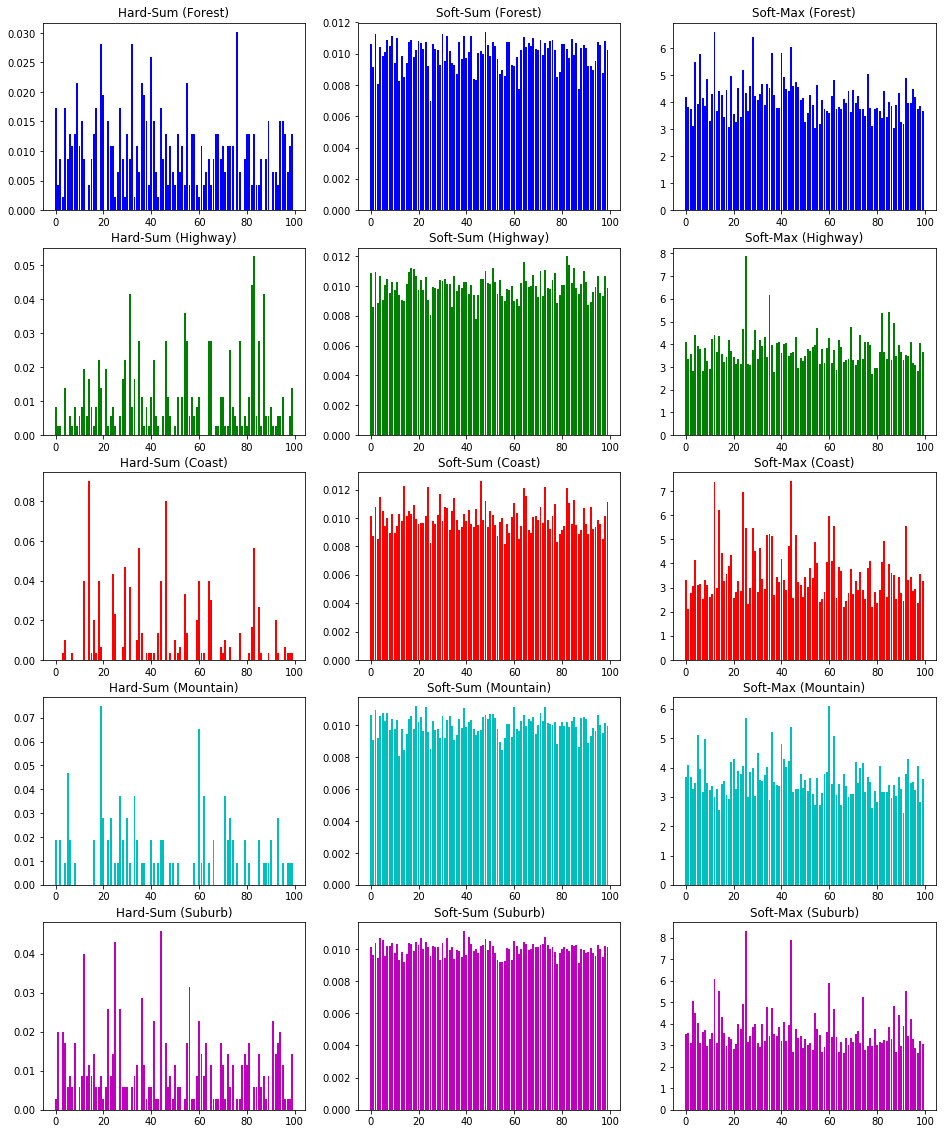

In [40]:
# Choose one image from each category and plot their Hard-Sum, Soft-Sum, and Soft-Max, respectively
cat_list = os.listdir("/data/put_data/cclin/ntu/dlcv2018/hw2/Problem3/train-100/")

plt.figure(figsize=(16,20))
col = 1
for i,cat,color in zip([1,101,201,301,401], cat_list, ['b','g','r','c','m']):
    plt.subplot(5,3,col)
    plt.title("Hard-Sum ("+ cat +")")
    plt.bar(np.arange(train_X_hard_sum.shape[1]), train_X_hard_sum[i],color=color )
    col+=1
    plt.subplot(5,3,col)
    plt.title("Soft-Sum ("+ cat +")")
    plt.bar(np.arange(train_X_soft_sum.shape[1]), train_X_soft_sum[i],color=color )
    col+=1
    plt.subplot(5,3,col)
    plt.title("Soft-Max ("+ cat +")")
    plt.bar(np.arange(train_X_soft_max.shape[1]), train_X_soft_max[i],color=color )
    col+=1
plt.show()